<a href="https://colab.research.google.com/github/Graviton12/CS-430-Group-Project/blob/main/invasive_2021_clean_ty.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
invasive_data_2021 = pd.read_excel('/content/drive/MyDrive/CS430/Olmsted Project/olmstead_dataset.xlsx', sheet_name='2021 Cherokee Invasive Survey', skiprows=1)

In [4]:
invasive_data_2021.head()

,Trimble\nStation,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present
0,1,37,5,23,90.0,40.30,59.70,"Cherry, sassafrass, maple, hackberry, walnutash","Box elder, sugar maple saplings",2,...,0,3,0,0,0,1,3,0,0,1.0
1,2,8,4,3,5.0,5.20,94.80,"Cherry, black locust, ash, sugar maple, tulip ...","Sugar maple, ash, redbud, box elder,",1,...,0,4,0,0,0,2,1,0,0,0.0
2,3,10,6,13,17.0,11.96,88.04,"Tilia basswood, n red oak, maple, pin oak, hic...","Holly, maple saplings, ash saplings, buckeye",1,...,0,4,0,0,0,2,1,0,0,0.0
3,4,6,3,8,3.0,5.20,94.80,"Elm, cottonwood, walnut, sycamore, ironwood","Box elder, redbud, ash saplings",1,...,0,3,0,0,0,3,3,0,0,0.0
4,5,25,23,30,22.0,26.00,74.00,Basswood locust red oak ash?,Buckeye Spicebush ash sapling,3,...,1,3,0,0,1,1,3,0,0,0.0


In [5]:
invasive_data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 25 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Trimble
Station                            164 non-null    int64  
 1   N                                          164 non-null    int64  
 2   E                                          164 non-null    int64  
 3   S                                          164 non-null    int64  
 4   W                                          163 non-null    float64
 5   Calculated using formula in densiometer    164 non-null    float64
 6   Calculated using formula in densiometer.1  164 non-null    float64
 7   Canopy                                     164 non-null    object 
 8   Understory                                 164 non-null    object 
 9   Lonicera japonica                          164 non-null    int64  
 10  Microstegium vimineum     

In [6]:
#dropping N, E, S, W, Canopy, Understory, and "Canopy gap and/or downed trees present" columns from data


In [7]:
invasive_data_2021.drop(['N', 'E', 'S', 'W', 'Calculated using formula in densiometer', 'Canopy', 'Understory', 'Canopy gap and/or downed trees present'], axis=1, inplace=True)

In [8]:
#renaming Calculated using formula in densiometer.1 to average_canopy_cover
invasive_data_2021.rename(columns={'Calculated using formula in densiometer.1': 'average_canopy_cover'}, inplace=True)

In [9]:
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0


In [10]:
# creating a column invasive_sum where each from is the sum from columns 2-16\
invasive_data_2021['invasive_sum'] = invasive_data_2021.iloc[:, 2:17].sum(axis=1)
invasive_data_2021.head()

,Trimble\nStation,average_canopy_cover,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,invasive_sum
0,1,59.70,2,1,0,3,1,2,0,3,0,0,0,1,3,0,0,16
1,2,94.80,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,8
2,3,88.04,1,0,0,0,0,0,0,4,0,0,0,2,1,0,0,8
3,4,94.80,1,0,0,3,0,0,0,3,0,0,0,3,3,0,0,13
4,5,74.00,3,0,0,3,0,0,1,3,0,0,1,1,3,0,0,15


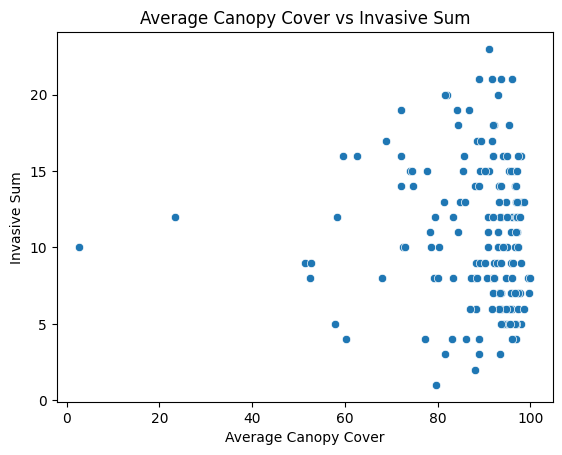

In [16]:
sns.scatterplot(x='average_canopy_cover', y='invasive_sum', data=invasive_data_2021)
#adding a trend line
plt.title('Average Canopy Cover vs Invasive Sum')
plt.xlabel('Average Canopy Cover')
plt.ylabel('Invasive Sum')
plt.show()

In [20]:
#checking the correlation between average canopy cover and invasive sum
invasive_data_2021['average_canopy_cover'].corr(invasive_data_2021['invasive_sum'])

-0.02980054143504391

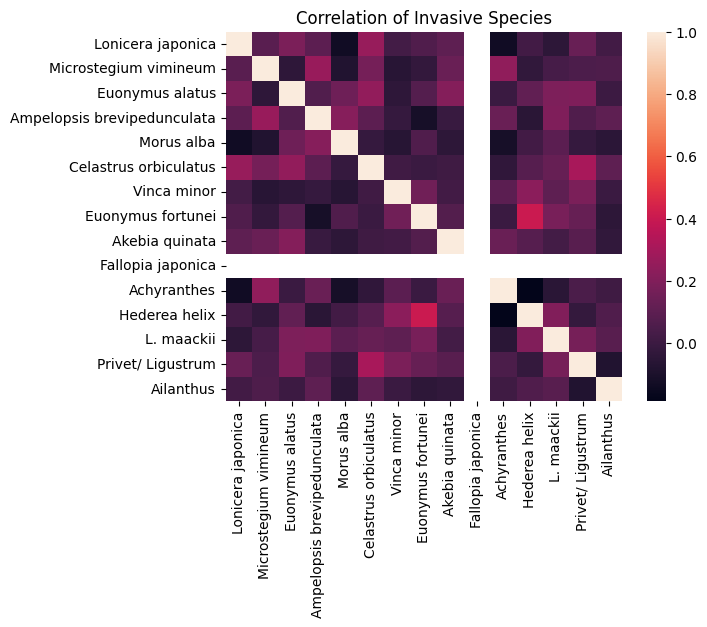

<Figure size 2000x2000 with 0 Axes>

In [28]:
# plotting the correlation of columns 2-16 into heatmap, making it larger
sns.heatmap(invasive_data_2021.iloc[:, 2:17].corr())
plt.title('Correlation of Invasive Species')
plt.figure(figsize=(20,20))
plt.show()


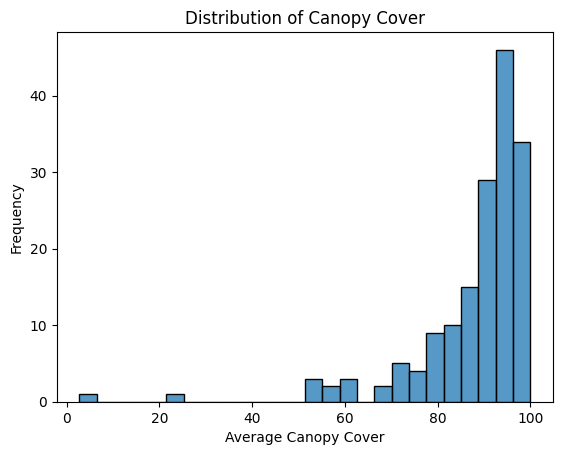

In [52]:
#distribution of canopy cover
sns.histplot(invasive_data_2021['average_canopy_cover'])
plt.title('Distribution of Canopy Cover')
plt.xlabel('Average Canopy Cover')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='Trimble\nStation', ylabel='average_canopy_cover'>

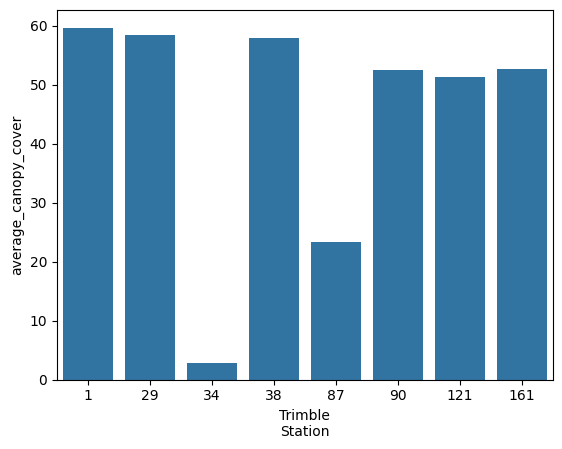

In [33]:
#bar plot of trimble stations with canopy cover less than 60%
sns.barplot(x='Trimble\nStation', y='average_canopy_cover', data=invasive_data_2021[invasive_data_2021['average_canopy_cover'] < 60])

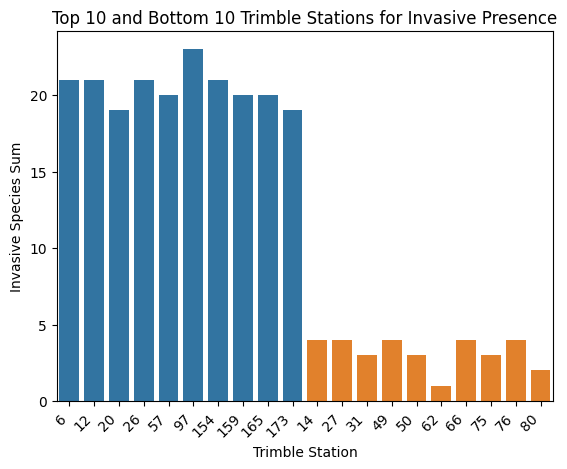

In [49]:
#plotting trible station invasive species sum... the top 10, sorting from largest to smallest ... adding a gap between columns
sns.barplot(x='Trimble\nStation', y='invasive_sum', data=invasive_data_2021.sort_values(by='invasive_sum', ascending=False).head(10))
#plotting the trimble station invasive species sum bottom 10
sns.barplot(x='Trimble\nStation', y='invasive_sum', data=invasive_data_2021.sort_values(by='invasive_sum', ascending=False).tail(10))
plt.title('Top 10 and Bottom 10 Trimble Stations for Invasive Presence')
plt.xlabel('Trimble Station')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Invasive Species Sum')
plt.show()